<a href="https://colab.research.google.com/github/ashkash2476/DEEP-learning/blob/master/Assignment_3_Final_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import SeparableConv2D
from keras import optimizers



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

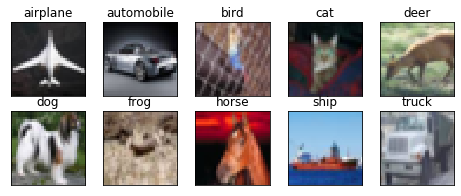

In [84]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [85]:
[sum(x) for x in zip(*train_labels)]

[225000]

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [89]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [90]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_126 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_127 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_100 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 16s 40ms/step - loss: 1.8666 - acc: 0.2848 - val_loss: 1.4137 - val_acc: 0.4806
Epoch 2/50
390/390 [==============================] - 7s 19ms/step - loss: 1.3606 - acc: 0.5076 - val_loss: 1.1414 - val_acc: 0.5836
Epoch 3/50
390/390 [==============================] - 7s 19ms/step - loss: 1.1474 - acc: 0.5900 - val_loss: 0.9979 - val_acc: 0.6479
Epoch 4/50
390/390 [==============================] - 7s 19ms/step - loss: 1.0204 - acc: 0.6413 - val_loss: 0.9083 - val_acc: 0.6834
Epoch 5/50
390/390 [==============================] - 7s 18ms/step - loss: 0.9199 - acc: 0.6792 - val_loss: 0.8073 - val_acc: 0.7167
Epoch 6/50
390/390 [==============================] - 7s 19ms/step - loss: 0.8309 - acc: 0.7126 - val_loss: 0.7974 - val_acc: 0.7264
Epoch 7/50
390/390 [==============================] - 7s 19ms/step - loss: 0.7823 - acc: 0.7300 - val_loss: 0.7167 - val_acc: 0.7539
Epoch 8/50
390/390 [==============================] - 8s 19ms/step -

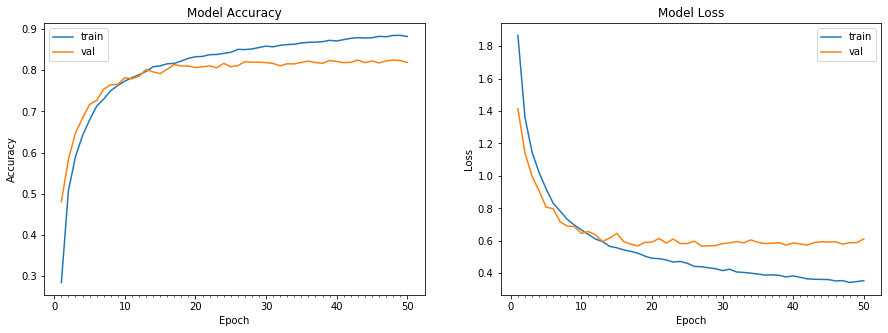

Accuracy on test data is: 81.87


In [91]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [79]:

model_2 = Sequential()

model_2.add(SeparableConv2D(32, kernel_size=(3, 3), depth_multiplier=2,input_shape=(32, 32, 3))) # Output Size: 30,30,32   RF: 3
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.15))


model_2.add(SeparableConv2D(64, kernel_size=(3, 3), depth_multiplier=2))  # Output Size:28,28,64   RF: 5
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.15))

model_2.add(SeparableConv2D(128, kernel_size=(3, 3),  depth_multiplier=2))  # Output Size:26,26,128   RF: 7
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.15))

model_2.add(SeparableConv2D(256, kernel_size=(3, 3),  depth_multiplier=1))  # Output Size:24,24,128   RF:  8
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.15))
 

model_2.add(MaxPooling2D(pool_size=(2, 2))) # 12,12,128   RF: 11
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(32, kernel_size=(3, 3),  depth_multiplier=1))  #Output Size: 10,10,32    RF:  20
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.05))


model_2.add(SeparableConv2D(64, kernel_size=(3, 3),  depth_multiplier=1))  # Output Size:8,8,64    RF:  28
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))


model_2.add(SeparableConv2D(128, kernel_size=(3, 3),  depth_multiplier=1))  # Output Size:6,6,32  RF:36


model_2.add(MaxPooling2D(pool_size=(2, 2))) # Output Size:3,3,32    RF 42

model_2.add(SeparableConv2D( 10,kernel_size=(3, 3)))  # Output Size:1,1,10    RF:50

model_2.add(Flatten())
model_2.add(Activation('softmax'))  



model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_121 (Separa (None, 30, 30, 32)        278       
_________________________________________________________________
batch_normalization_119 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
activation_119 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_122 (Separa (None, 28, 28, 64)        4736      
_________________________________________________________________
batch_normalization_120 (Bat (None, 28, 28, 64)        256       
_________________________________________________________________
activation_120 (Activation)  (None, 28, 28, 64)      

In [0]:
datagen = ImageDataGenerator(rotation_range=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
390/390 [==============================] - 47s 122ms/step - loss: 1.4960 - acc: 0.4468 - val_loss: 1.7016 - val_acc: 0.4723
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0032744503.
390/390 [==============================] - 35s 90ms/step - loss: 1.1336 - acc: 0.5939 - val_loss: 1.2215 - val_acc: 0.5872
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028315018.
390/390 [==============================] - 35s 90ms/step - loss: 0.9920 - acc: 0.6501 - val_loss: 0.9976 - val_acc: 0.6508
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0025329586000000003.
390/390 [==============================] - 35s 90ms/step - loss: 0.9048 - acc: 0.6813 - val_loss: 0.9336 - val_acc: 0.6747
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0023181019000000002.
390/390 [==============================] - 35s 90ms/step - loss: 0

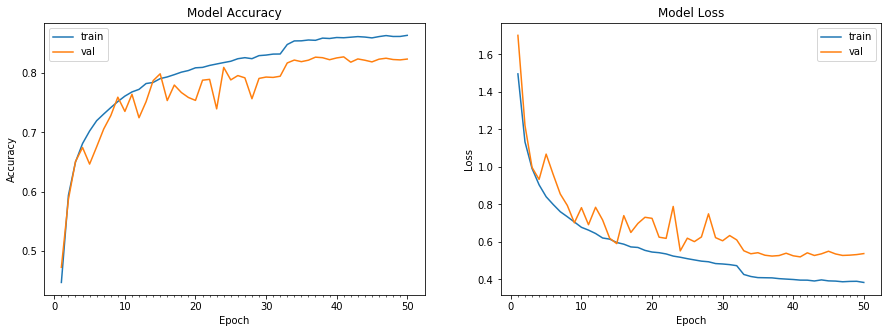

Accuracy on test data is: 82.40


In [81]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,rotation_range = 20)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch,lr):
  if(epoch % 10 < 5 | epoch>35 ):
    return round(0.003*1/(1 + 0.319*epoch),10)
  else:
    return 0.001 +  round(0.003*1/(1 + 0.319*epoch),10)

model_2.compile(loss = 'categorical_crossentropy',optimizer = Adam(lr = 0.003), metrics = ['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128,shuffle=False),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks = [LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_2))

